# Spike centered plot
based on conversations with Robert and Ted Carnevale.


In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from neuron import h
h.load_file("stdrun.hoc")
sys.path.insert(1, "./utils/")
import HH, Stimuli
import matplotlib as mpl
import random

## Hyperparameters

In [2]:
# these parameters belong to the 5 different input classes described in the paper
# hyper parameters
# base
base_e_weight = 0.0002
base_i_weight = 0.0005
base_e_tau = 2
base_i_tau = 6

# low weight
lw_e_weight = 0.00015
lw_i_weight = 0.0002
lw_e_tau = 2
lw_i_tau = 6

# long tau
lt_e_weight = 0.0002
lt_i_weight = 0.0005
lt_e_tau = 10
lt_i_tau = 40

# low weight long tau
lwlt_e_weight = 0.00015
lwlt_i_weight = 0.0002
lwlt_e_tau = 10
lwlt_i_tau = 40

# burst
burst_e_weight = 0.0001
burst_i_weight = 0.0005
burst_e_tau = 40
burst_i_tau = 20

In [3]:
sim_duration = 100000
sims = {
    'base':{},
    'half_weight':{},
    'long_tau':{},
    'long_tau_half_weight':{},
    'burst':{}
}

e_times = Stimuli.poisson_process_duration(5, sim_duration)
i_times = Stimuli.poisson_process_duration(15, sim_duration)

In [4]:
# base
base_hh = HH.HH()
base_e_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = base_e_weight,
    tau = base_e_tau,
    seed = 'na',
    stim_times = e_times
)
base_i_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = base_i_weight,
    tau = base_i_tau,
    seed = 'na',
    stim_times = i_times
)

base_hh.add_custom_stimulus(base_e_stims)
base_hh.add_custom_stimulus(base_i_stims)
base_hh.run_simulation(sim_duration)

# half weight
hw_hh = HH.HH()
hw_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lw_e_weight,
    tau = lw_e_tau,
    seed = 'na',
    stim_times = e_times
)
hw_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lw_i_weight,
    tau = lw_i_tau,
    seed = 'na',
    stim_times = i_times
)

hw_hh.add_custom_stimulus(hw_e_stims)
hw_hh.add_custom_stimulus(hw_i_stims)
hw_hh.run_simulation(sim_duration)

# long tau
lt_hh = HH.HH()
lt_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lt_e_weight,
    tau = lt_e_tau,
    seed = 'na',
    stim_times = e_times
)
lt_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lt_i_weight,
    tau = lt_i_tau,
    seed = 'na',
    stim_times = i_times
)

lt_hh.add_custom_stimulus(lt_e_stims)
lt_hh.add_custom_stimulus(lt_i_stims)
lt_hh.run_simulation(sim_duration)

# half weight long tau
hwlt_hh = HH.HH()
hwlt_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = lwlt_e_weight,
    tau = lwlt_e_tau,
    seed = 'na',
    stim_times = e_times
)
hwlt_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = lwlt_i_weight,
    tau = lwlt_i_tau,
    seed = 'na',
    stim_times = i_times
)

hwlt_hh.add_custom_stimulus(hwlt_e_stims)
hwlt_hh.add_custom_stimulus(hwlt_i_stims)
hwlt_hh.run_simulation(sim_duration)

# burst
burst_hh = HH.HH()
burst_hh.axon.insert(h.Nap)
burst_e_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = burst_e_weight,
    tau = burst_e_tau,
    seed = 'na',
    stim_times = e_times
)
burst_i_stims = Stimuli.PoissonStim(
    name='', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = burst_i_weight,
    tau = burst_i_tau,
    seed = 'na',
    stim_times = i_times
)

burst_hh.add_custom_stimulus(burst_e_stims)
burst_hh.add_custom_stimulus(burst_i_stims)
burst_hh.run_simulation(sim_duration)

In [5]:
sim_names = ['base','low weight','long tau', 'half weight\nlong tau','burst']
sims = [base_hh, hw_hh, lt_hh, hwlt_hh, burst_hh]

df_base = np.array([base_hh._v, base_hh._m, base_hh._n, base_hh._h]).T
df_hw = np.array([hw_hh._v, hw_hh._m, hw_hh._n, hw_hh._h]).T
df_lt = np.array([lt_hh._v, lt_hh._m, lt_hh._n, lt_hh._h]).T
df_hwlt = np.array([hwlt_hh._v, hwlt_hh._m, hwlt_hh._n, hwlt_hh._h]).T
df_burst = np.array([burst_hh._v, burst_hh._m, burst_hh._n, burst_hh._h]).T

## action potential variance

In [6]:
def get_spike_windows(df, spikes, prespike_window=100, postspike_window=100):
    spike_windows = []
    for spike in spikes[10:-10]:
        start = int((spike-prespike_window)*40)
        stop = int((spike+postspike_window)*40)
        spike_windows.append((df[start:stop, :]))
    spike_windows = np.stack(spike_windows)
    return spike_windows
spike_windows = get_spike_windows(df_base, np.array(base_hh.spike_times))
spike_windows_hw = get_spike_windows(df_hw, np.array(hw_hh.spike_times))
spike_windows_lt = get_spike_windows(df_lt, np.array(lt_hh.spike_times))
spike_windows_hwlt = get_spike_windows(df_hwlt, np.array(hwlt_hh.spike_times))
spike_windows_burst = get_spike_windows(df_burst, np.array(burst_hh.spike_times))

print(len(base_hh.spike_times), spike_windows.shape)
print(len(hw_hh.spike_times), spike_windows_hw.shape)
print(len(lt_hh.spike_times), spike_windows_lt.shape)
print(len(hwlt_hh.spike_times), spike_windows_hwlt.shape)
print(len(burst_hh.spike_times), spike_windows_burst.shape)

2273 (2253, 8000, 4)
1468 (1448, 8000, 4)
1831 (1811, 8000, 4)
2362 (2342, 8000, 4)
3284 (3264, 8000, 4)


In [7]:
# normalize
def normalize_vec(vec, axis=1):
    vec = vec - np.min(vec)
    vec = vec / np.max(vec)
    return vec

def normalize_df(spike_windows):
    return np.array(
        [normalize_vec(spike_windows[:,:,0]),
        normalize_vec(spike_windows[:,:,1]),
        normalize_vec(spike_windows[:,:,2]),
        normalize_vec(spike_windows[:,:,3])]
    )

spike_windows_norm = normalize_df(spike_windows)
spike_windows_norm_hw = normalize_df(spike_windows_hw)
spike_windows_norm_lt = normalize_df(spike_windows_lt)
spike_windows_norm_hwlt = normalize_df(spike_windows_hwlt)
spike_windows_norm_burst = normalize_df(spike_windows_burst)

In [8]:
spike_windows_vars = np.var(spike_windows_norm, axis=(0,1))
spike_windows_vars_hw = np.var(spike_windows_norm_hw, axis=(0,1))
spike_windows_vars_lt = np.var(spike_windows_norm_lt, axis=(0,1))
spike_windows_vars_hwlt = np.var(spike_windows_norm_hwlt, axis=(0,1))
spike_windows_vars_burst = np.var(spike_windows_norm_burst, axis=(0,1))

In [9]:
def state_variable_vars(spike_windows_norm):
    v_vars = np.var(spike_windows_norm[0,:], axis=(0))
    h_vars = np.var(spike_windows_norm[1,:], axis=(0))
    n_vars = np.var(spike_windows_norm[2,:], axis=(0))
    m_vars = np.var(spike_windows_norm[3,:], axis=(0))
    return v_vars, h_vars, n_vars, m_vars
v_vars, h_vars, n_vars, m_vars = state_variable_vars(spike_windows_norm)
v_vars_hw, h_vars_hw, n_vars_hw, m_vars_hw = state_variable_vars(spike_windows_norm_hw)
v_vars_lt, h_vars_lt, n_vars_lt, m_vars_lt = state_variable_vars(spike_windows_norm_lt)
v_vars_hwlt, h_vars_hwlt, n_vars_hwlt, m_vars_hwlt = state_variable_vars(spike_windows_norm_hwlt)
v_vars_burst, h_vars_burst, n_vars_burst, m_vars_burst = state_variable_vars(spike_windows_norm_burst)

In [10]:
spike_windows[0][0]

array([-7.42236441e+01,  1.67439386e-02,  4.75645743e-01,  3.90968686e-01])

In [26]:
def spike_center_plot(spike_windows, v_vars, h_vars, n_vars, m_vars, prespike_window=100, postspike_window=100):
    fig, ax = plt.subplots(figsize=(12,5))
    
    _t = np.arange(0, prespike_window+postspike_window, 1/40)
    
    num_traces = min(1000, spike_windows.shape[0])

    for i in range(num_traces):
        ax.plot(_t-prespike_window, spike_windows[i,:,0], c='black', alpha=0.01)

    ax2=ax.twinx()
    ax2.plot(_t-prespike_window, v_vars, c='purple')
    ax2.plot(_t-prespike_window, h_vars, c='red')
    ax2.plot(_t-prespike_window, n_vars, c='blue')
    ax2.plot(_t-prespike_window, m_vars, c='green')

    ax.set_ylabel('Membrane voltage (mV)')
    ax2.set_ylabel('Variance of normalized state variables', color='red')
    ax2_yticks=np.arange(0,16,2)/100
    ax2.set_yticks(ax2_yticks)
    ax2.set_yticklabels(ax2_yticks, color='red')
    ax.set_xlabel('time (ms)')
    ax.set_xlim(0-prespike_window, postspike_window)
    
    ax2.legend(['Vm','h','n','m'])
    
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    plt.show()

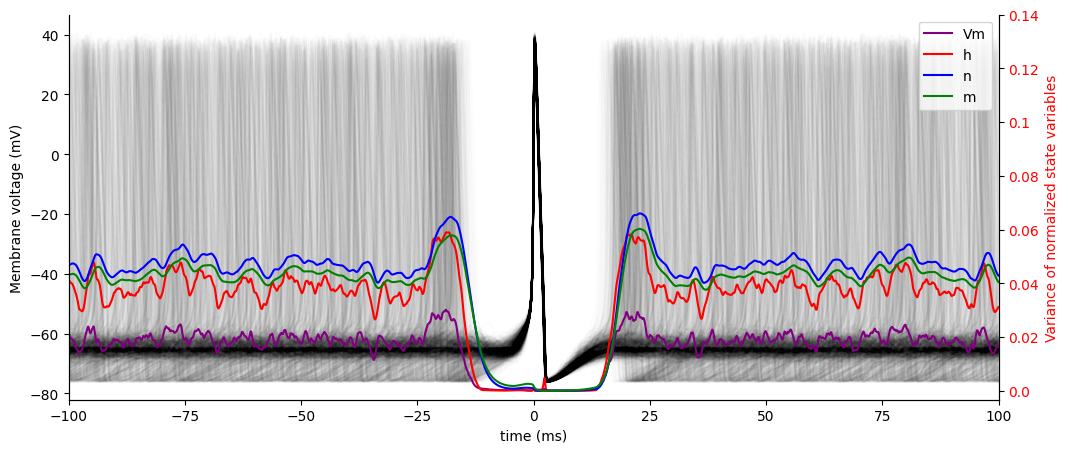

In [27]:
spike_center_plot(spike_windows, v_vars=v_vars, h_vars=h_vars, n_vars=n_vars, m_vars=m_vars)

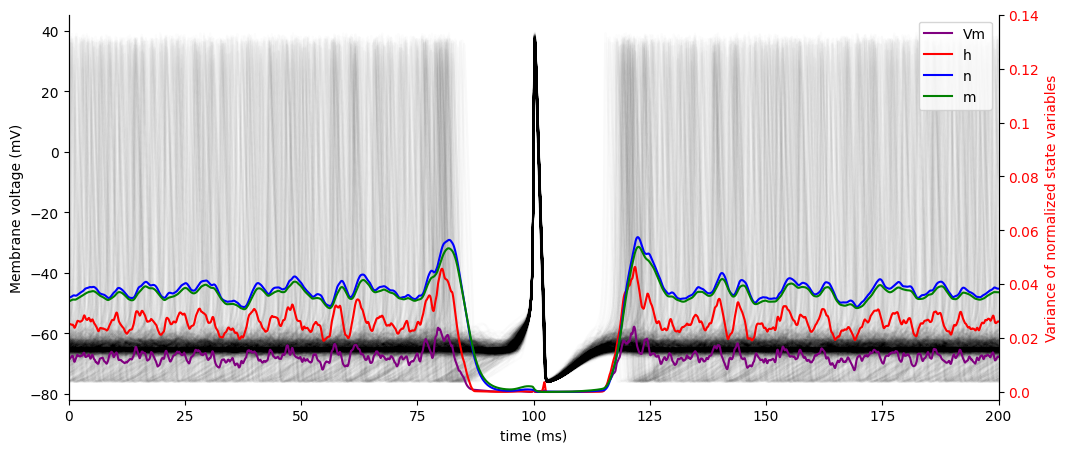

In [13]:
spike_center_plot(spike_windows_hw, v_vars_hw, h_vars_hw, n_vars_hw, m_vars_hw)

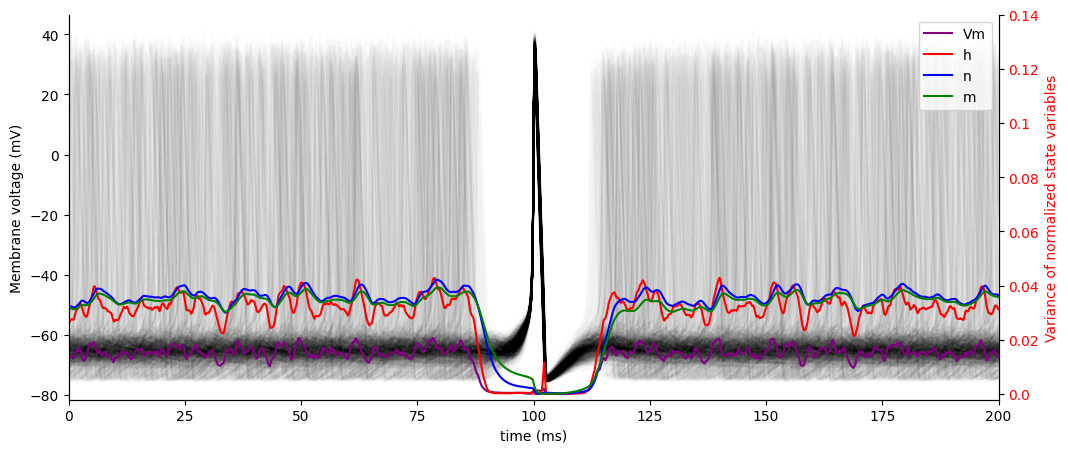

In [14]:
spike_center_plot(spike_windows_lt, v_vars_lt, h_vars_lt, n_vars_lt, m_vars_lt)

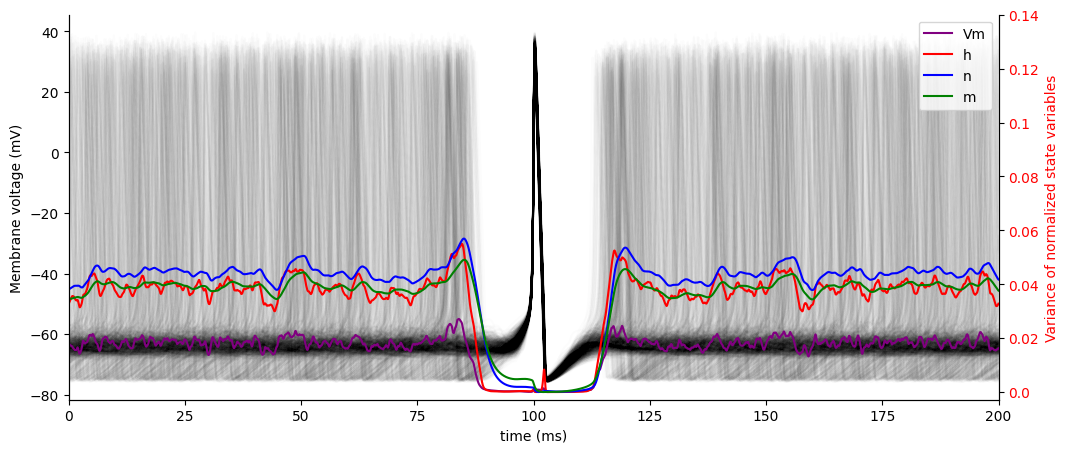

In [15]:
spike_center_plot(spike_windows_hwlt, v_vars_hwlt, h_vars_hwlt, n_vars_hwlt, m_vars_hwlt)

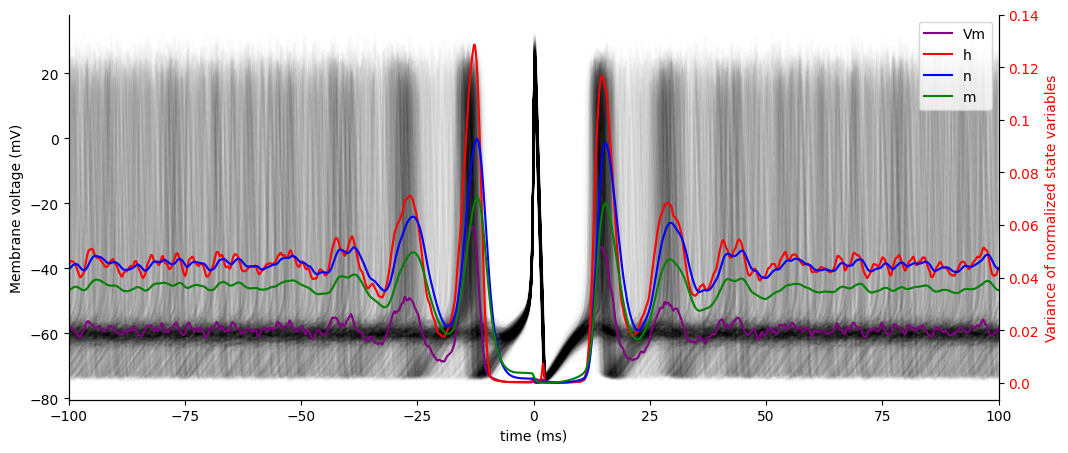

In [28]:
spike_center_plot(spike_windows_burst, v_vars_burst, h_vars_burst, n_vars_burst, m_vars_burst)

## get the baseline state variable variance

In [17]:
print('base v var:', np.var(normalize_vec(df_base[:,0]), axis=(0)))
print('base h var:', np.var(normalize_vec(df_base[:,1]), axis=(0)))
print('base n var:', np.var(normalize_vec(df_base[:,2]), axis=(0)))
print('base m var:', np.var(normalize_vec(df_base[:,3]), axis=(0)))

base v var: 0.01824593892440416
base h var: 0.03844210416641653
base n var: 0.03541936313606525
base m var: 0.02890471855404327


In [18]:
print('min v var:', np.min(v_vars))
print('min h var:', np.min(h_vars))
print('min n var:', np.min(n_vars))
print('min m var:', np.min(m_vars))

min v var: 3.9710909383589e-06
min h var: 2.831913346738785e-07
min n var: 6.000642945733309e-06
min m var: 8.685369444413427e-07


In [19]:
print('percent v var:', np.min(v_vars) / np.var(normalize_vec(df_base[:,0]), axis=(0))*100)
print('percent h var:', np.min(h_vars) / np.var(normalize_vec(df_base[:,1]), axis=(0))*100)
print('percent n var:', np.min(n_vars) / np.var(normalize_vec(df_base[:,2]), axis=(0))*100)
print('percent m var:', np.min(m_vars) / np.var(normalize_vec(df_base[:,3]), axis=(0))*100)

percent v var: 0.021764245483949955
percent h var: 0.0007366697032189975
percent n var: 0.016941701980020193
percent m var: 0.003004827543355718
